# Chapter 02. Small Worlds and Large Worlds

#### Chapter Code

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Code 2.1**

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways/sum(ways)

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

**Code 2.2**

In [3]:
stats.binom.pmf(k=6, n=9, p=0.5)

0.16406250000000006

That number is the relative number of ways to get 6 water (in our globe-tossing model) holding p at 0.5.

Much later in the book, in Chapter 10, we’ll see that the binomial distribution is rather special, because it represents the maximum entropy way to count binary events. “Maximum entropy” means that the distribution contains no additional information other than: There are two events, and the probabilities of each in each trial are p and 1 − p. Chapter 10 explains this in more detail, and the details can certainly wait.

**Code 2.3** Grid Approximation

1. Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.

2. Compute the value of the prior at each parameter value on the grid.

3. Compute the likelihood at each parameter value.

4. Compute the unstandardized posterior at each parameter value by multiplying the prior by the likelihood.

5. Finally, standardize the posterior by dividing the values by the sum of all values.

In [4]:
def grid_approximation(n_success, n_trials, n_points):
    # Define the grid.
    p_grid = np.linspace(0, 1, n_points)
    
    # Define the prior.
    # For a uniform prior.
    prior = np.repeat(1, n_points)
    
    # Compute the likelihood at each parameter value.
    likelihood = stats.binom.pmf(n_success, n_trials, p_grid)
    
    # Compute the unstandardized posterior at each parameter value.
    posterior_unstd = likelihood * prior
    
    # Standardize the posterior.
    posterior_std = posterior_unstd / np.sum(posterior_unstd)
    
    # We want both the grid and posterior for plotting.
    return p_grid, posterior_std

In [5]:
p_grid, posterior = grid_approximation(n_success=6, n_trials=9, n_points=50)

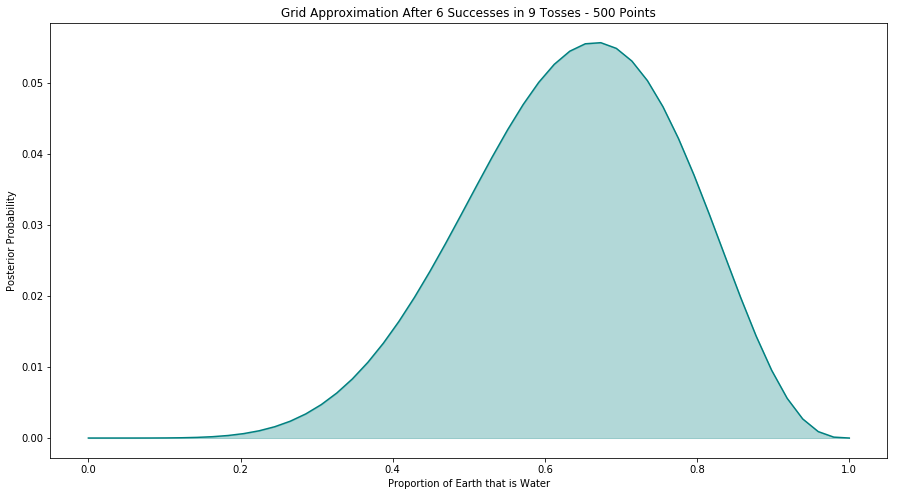

In [6]:
plt.figure(figsize=(15, 8))
plt.fill_between(p_grid, posterior, color="teal", alpha=0.3)
plt.plot(p_grid, posterior, color="teal")
plt.title('Grid Approximation After 6 Successes in 9 Tosses - 500 Points')
plt.xlabel('Proportion of Earth that is Water')
plt.ylabel('Posterior Probability');

#### End Chapter Problems

**2H1.** Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

In [7]:
import random
import pandas as pd # I'm joking
pandas = ('A', 'B')
p_twins = {'A':.10, 'B':.20}
n_twins = 0
n_success = 0
n_sims = 10**6

while n_twins < n_sims:
    panda = random.choice(pandas)
    if random.random() <= p_twins[panda]:
        n_twins += 1
        if random.random() <= p_twins[panda]:
            n_success += 1
            
percentage = round((n_success/n_twins)*100, 2)
print(f'If a panda\'s first birth is twins, the second birth is twins {percentage}% of the time.')

If a panda's first birth is twins, the second birth is twins 16.61% of the time.


**2H2.** Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

In [8]:
panda_counts = {panda:0 for panda in pandas}
n_twins = 0

while n_twins < n_sims:
    panda = random.choice(pandas)
    if random.random() <= p_twins[panda]:
        n_twins += 1
        panda_counts[panda] += 1
        
panda_counts['A']/n_sims

0.333104

**2H3.** Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A.

In [9]:
n_twins = 0
n_success = 0
n_sims = 10**6

panda_counts = {panda:0 for panda in pandas}

while n_success < n_sims:
    panda = random.choice(pandas)
    if random.random() <= p_twins[panda]:
        if random.random() > p_twins[panda]:
            # Success is defined as having twins followed by a single infant. 
            n_success += 1
            panda_counts[panda] += 1
            
panda_counts['A']/n_sims

0.359468